<a href="https://colab.research.google.com/github/marcel1710/TwitterBot/blob/main/TwitterBot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
# https://www.youtube.com/watch?v=ujId4ipkBio

In [39]:
import pandas as pd
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud

import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')

stop = stopwords.words('english')


from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import MWETokenizer
from nltk.tokenize import WordPunctTokenizer

import re

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [30]:
from google.colab import files


In [31]:
file = 'credentials.csv'
credentials= pd.read_csv(file)

In [25]:
api_key = credentials['Key'][0]
api_secretkey = credentials['Key'][1]
access_key = credentials['Key'][2]
access_secretkey = credentials['Key'][3]

In [26]:
authenticate = tweepy.OAuthHandler(api_key, api_secretkey)
authenticate.set_access_token(access_key, access_secretkey)
api = tweepy.API(authenticate, wait_on_rate_limit=True) 

In [42]:
posts = api.search(q ='#AAPL', count = 10000, lang = "en", tweet_mode="extended")

print("Last 5 posts: \n")
i = 1
for tweet in posts[0:5]:
    print(str(i) + ')'+ tweet.full_text + '\n')
    i = i+1


Last 5 posts: 

1)RT @cryptoexp76258C: #AUDCAD Both TPs hit! 70 Pips Profit✅🔥

For Free signals, Join https://t.co/PXLBnt0aio

#forex #aapl #SP500 #fx #S&amp;P50…

2)#AUDCAD Both TPs hit! 70 Pips Profit✅🔥

For Free signals, Join https://t.co/PXLBnt0aio

#forex #aapl #SP500 #fx #S&amp;P500 #ES_F #usoil #DOW #bitcoin #BTC #SPY #PIPS #xauusd #SPX #crudeoil #DJIA #stocks 88866 https://t.co/hr65w0MXpu

3)Apple should come out with apps to replace Facebook, Instagram, WhatsApp. Make them available for all, not just iOS. FB would be toast. AAPL has the resources to do it. All for the greater good of humanity.
 @tim_cook @GerberKawasaki #AAPL #merryxmaszuck

4)@anasalhajji Should buy #AAPL and #TSLA ‼️

5)#AUDCAD Both TPs hit! 70 Pips Profit✅🔥

Get Daily Forex Signals at https://t.co/PxlnMaDUDo

#nasdaq #xauusd #fx #aapl #silver #DJI #BTC #CHFJPY #bitcoin #gold #stocks #usoil #GER30 #DAX30 #crudeoil #forex #NZDUSD 14627 https://t.co/tFyNn8qD8I



In [48]:
df = pd.DataFrame([tweet.full_text for tweet in posts] , columns = ['Tweets'])
df.head()

,Tweets
0,RT @cryptoexp76258C: #AUDCAD Both TPs hit! 70 ...
1,#AUDCAD Both TPs hit! 70 Pips Profit✅🔥\n\nFor ...
2,Apple should come out with apps to replace Fac...
3,@anasalhajji Should buy #AAPL and #TSLA ‼️
4,#AUDCAD Both TPs hit! 70 Pips Profit✅🔥\n\nGet ...


In [50]:
#cleaning text
def clean_tweets(tweet):
    user_removed = re.sub(r'@[A-Za-z0-9]+','',tweet)
    link_removed = re.sub('https?://[A-Za-z0-9./]+','',user_removed)
    only_alphanumeric = re.sub('[^a-zA-Z0-9]', ' ', user_removed)
    lower_case_tweet = only_alphanumeric .lower()
    tok = WordPunctTokenizer()
    words = tok.tokenize(lower_case_tweet)
    clean_tweet = (' '.join(words)).strip()
    return clean_tweet

df['Tweets'] = df['Tweets'].apply(clean_tweets)
df.head()


,Tweets
0,rt audcad both tps hit 70 pips profit for free...
1,audcad both tps hit 70 pips profit for free si...
2,apple should come out with apps to replace fac...
3,should buy aapl and tsla
4,audcad both tps hit 70 pips profit get daily f...


In [73]:
#removing stopwords
df['Tweets'] = df['Tweets'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df.head()

,Tweets,Subjectivity,Polarity,Analysis
0,rt audcad tps hit 70 pips profit free signals ...,0.8,0.400000,Positive
1,audcad tps hit 70 pips profit free signals joi...,0.8,0.400000,Positive
2,apple come apps replace facebook instagram wha...,0.5,0.533333,Positive
3,buy aapl tsla,0.0,0.000000,Neutral
4,audcad tps hit 70 pips profit get daily forex ...,0.0,0.000000,Neutral


In [74]:
df.dtypes

Tweets           object
Subjectivity    float64
Polarity        float64
Analysis         object
dtype: object

In [125]:
#warum funktioniert die auskommentierte methode net? wird doch ein string übergeben?


df_string['Tweets'] = df['Tweets'].astype(str)

wc_text =  ' '.join(word for word in df_string['Tweets'])
print(wc_text)

df_string.dtype
#WordCloud.generate(wc_text)



df_string.dtypes



rt audcad tps hit 70 pips profit free signals join https co pxlbnt0aio forex aapl sp500 fx amp p50 audcad tps hit 70 pips profit free signals join https co pxlbnt0aio forex aapl sp500 fx amp p500 es f usoil dow bitcoin btc spy pips xauusd spx crudeoil djia stocks 88866 https co hr65w0mxpu apple come apps replace facebook instagram whatsapp make available ios fb would toast aapl resources greater good humanity cook aapl merryxmaszuck buy aapl tsla audcad tps hit 70 pips profit get daily forex signals https co pxlnmadudo nasdaq xauusd fx aapl silver dji btc chfjpy bitcoin gold stocks usoil ger30 dax30 crudeoil forex nzdusd 14627 https co tfynn8qd8i audcad tps hit 70 pips profit forex signals join https co kplelwvuhi fx crudeoil eurtry eurgbp xauusd usdtry aapl forex stocks forexsignals forextrading usoil btc bitcoin ftse forexmarket wti 59602 https co 6tt8yszhko rt automotive apple potentially coming electric car tesla currently dominating industry legac apple potentially coming electric

dtype('O')

In [110]:
#text = " ".join(posts for posts in df.Tweets.astype(str))

WordCloud.generate_from_text(wc_text)

TypeError: ignored

In [53]:
def getSubjectivity(clean_tweets):
  return TextBlob(clean_tweets).sentiment.subjectivity

def getPolarity(clean_tweets):
  return TextBlob(clean_tweets).sentiment.polarity

df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

df.head()

,Tweets,Subjectivity,Polarity
0,rt audcad tps hit 70 pips profit free signals ...,0.8,0.400000
1,audcad tps hit 70 pips profit free signals joi...,0.8,0.400000
2,apple come apps replace facebook instagram wha...,0.5,0.533333
3,buy aapl tsla,0.0,0.000000
4,audcad tps hit 70 pips profit get daily forex ...,0.0,0.000000


In [ ]:
#Wordcloud

In [54]:
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)
df.head()

,Tweets,Subjectivity,Polarity,Analysis
0,rt audcad tps hit 70 pips profit free signals ...,0.8,0.400000,Positive
1,audcad tps hit 70 pips profit free signals joi...,0.8,0.400000,Positive
2,apple come apps replace facebook instagram wha...,0.5,0.533333,Positive
3,buy aapl tsla,0.0,0.000000,Neutral
4,audcad tps hit 70 pips profit get daily forex ...,0.0,0.000000,Neutral


In [55]:
#sortiert und print positiv
j = 1
sortedDF = df.sort_values(by = ['Polarity'])
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['Analysis'][i]=='Positive'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j = j+1

1) rt audcad tps hit 70 pips profit free signals join https co pxlbnt0aio forex aapl sp500 fx amp p50

2) audcad tps hit 70 pips profit free signals join https co pxlbnt0aio forex aapl sp500 fx amp p500 es f usoil dow bitcoin btc spy pips xauusd spx crudeoil djia stocks 88866 https co hr65w0mxpu

3) apple come apps replace facebook instagram whatsapp make available ios fb would toast aapl resources greater good humanity cook aapl merryxmaszuck

4) apple potentially coming electric car tesla currently dominating industry legacy brand automakers stand chance transitioning successfully ev space apple tesla aapl tsla timcook elonmusk ev https co 3osvufrtts

5) 1000 pips profit 12 days join free signals https co 5ixqzbzq65 audjpy stocks xauusd forextrading usoil gbpjpy nflx forexsignals eurgbp forex btc aapl bitcoin fx euraud crudeoil forexmarket 64293 https co wjieiqfmzw

6) would engineer prefer work apple tesla higher salary tsla aapl

7) rt epic comment well done freeing cash well sales

In [ ]:
j = 1
sortedDF = df.sort_values(by = ['Polarity'])
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['Analysis'][i]=='Negative'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j = j+1

In [ ]:
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color ='Blue' )

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

plt.show()

In [ ]:
percentage_positive = df[df.Analysis =='Positive']
percentage_positive = percentage_positive['Tweets']
#float zu string damit % print geht

print(str(round( (percentage_positive.shape[0] / df.shape[0]) * 100, 1))+"% are positive tweets")


In [ ]:
percentage_negative = df[df.Analysis =='Negative']
percentage_negative = percentage_negative['Tweets']
#float zu string damit % print geht

print(str(round( (percentage_negative.shape[0] / df.shape[0]) * 100, 1))+"% are negative tweets")

In [ ]:
percentage_neutral = 100 - round( (percentage_positive.shape[0] / df.shape[0]) * 100, 1) -round( (percentage_negative.shape[0] / df.shape[0]) * 100, 1)
percentage_neutral = str(round(percentage_neutral , 2))
print(percentage_neutral + "% are neutral tweets")

<function matplotlib.pyplot.show>

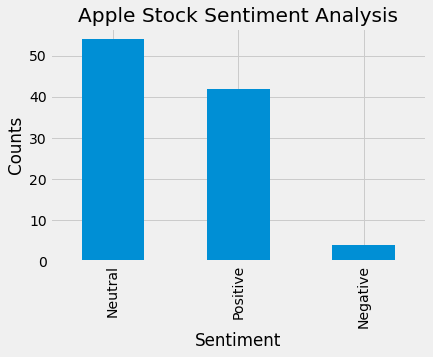

In [56]:
df['Analysis'].value_counts()

plt.title('Apple Stock Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show

In [ ]:
# Tweepy kann nur Tweets finden die max. eine Woche alt sind. Funktioniert dafür mit GetOldTweets3: https://github.com/Jefferson-Henrique/GetOldTweets-python
!pip install GetOldTweets3
import GetOldTweets3 as got

tweetCriteria = got.manager.TweetCriteria().setQuerySearch('#AAPL')\
                                           .setSince("2015-05-01")\
                                           .setUntil("2015-09-30")\
                                           .setMaxTweets(1)
tweet = got.manager.TweetManager.getTweets(tweetCriteria)[0]
print(tweet.text)

#gibt aber nen fehler: TypeError: object of type 'NoneType' has no len() aus jupyter